In [2]:
import os
import cobra
from os.path import join

In [3]:
modeliCW = cobra.io.read_sbml_model('iCW773.xml')

In [4]:
# Iterate through the the objects in the model
print("Reactions")
print("---------")
for x in modeliCW.reactions:
    print("%s : %s \n lower: %s, upper: %s" % (x.id, x.reaction, x.lower_bound, x.upper_bound))

Reactions
---------
ALAR : ala-L_c --> ala-D_c 
 lower: 1.29385595603849e-24, upper: 4.61339666666667
ALATA_L : glu-L_c + pyr_c --> akg_c + ala-L_c 
 lower: 1.29382274002717e-24, upper: 4.61339666666667
ASNN : asn-L_c + h2o_c --> asp-L_c + nh4_c 
 lower: 0.0, upper: 58.0457175
ASNS1 : asp-L_c + atp_c + gln-L_c + h2o_c --> amp_c + asn-L_c + glu-L_c + h_c + ppi_c 
 lower: 0.0, upper: 29.0228587499994
ASNS2 : asp-L_c + atp_c + nh4_c --> amp_c + asn-L_c + h_c + ppi_c 
 lower: 0.0, upper: 58.0457175
ASPT : asp-L_c --> fum_c + nh4_c 
 lower: 0.0, upper: 38.8830312499992
ASPTA : akg_c + asp-L_c <-- glu-L_c + oaa_c 
 lower: -39.4364512499998, upper: -4.620197787388e-15
DAAD : ala-D_c + fad_c + h2o_c --> fadh2_c + nh4_c + pyr_c 
 lower: 0.0, upper: 0.0
VPAMT : 3mob_c + ala-L_c --> pyr_c + val-L_c 
 lower: 0.0, upper: 2.30669833333333
2METS : h2o_c + oaa_c + ppcoa_c --> coa_c + hcat_c 
 lower: 0.0, upper: 0.0
ACHMSC : achms_c + cys-L_c --> ac_c + cyst-L_c + h_c 
 lower: 1.22962627371827e-27, upp

# Growth Rate(Biomass) Simulation 

https://biotechnologyforbiofuels.biomedcentral.com/articles/10.1186/s13068-017-0856-3

In [5]:
modeliCW.objective = 'CG_biomass_cgl_ATCC13032' 
modeliCW.objective.expression

-1.0*CG_biomass_cgl_ATCC13032_reverse_81110 + 1.0*CG_biomass_cgl_ATCC13032

In [6]:
# EX_glc(e) glucose uptake. Use pos. fluxes. 
# EX_o2(e) oxygen uptake. 

EX_glc_e = modeliCW.reactions.get_by_id('EX_glc(e)')
EX_o2_e = modeliCW.reactions.get_by_id('EX_o2(e)')

print(EX_glc_e.reaction, EX_o2_e.reaction)

glc-D_e <--  o2_e <-- 


In [7]:
# optimal glucose uptake
EX_o2_e.lower_bound = -8.5
EX_o2_e.upper_bound = -8.5

EX_glc_e.lower_bound = -4.67
EX_glc_e.upper_bound = -4.17

modeliCW.optimize()
modeliCW.summary()


IN FLUXES            OUT FLUXES          OBJECTIVES
-------------------  ------------------  ---------------------
o2_e       8.5       h2o_e      18.9     CG_biomass_c...  0.42
glc-D_e    4.67      co2_e       9.78
nh4_e      3.57      h_e         3.49
k_e        0.533     biomass_c   0.42
pi_e       0.209     ac_e        0.157
so4_e      0.0674    pyr_e       0.141
mg2_e      0.0237    his-L_e     0.0675
fe3_e      0.0213
fe2_e      0.0183
ca2_e      0.0142
cl_e       0.0142
cu2_e      0.00193
mn2_e      0.00189
zn2_e      0.00093
ni2_e      0.000881
cobalt2_e  6.87e-05
btn_e      9.99e-07


In [8]:
# optimal o2 uptake
EX_o2_e.lower_bound = -16.5
EX_o2_e.upper_bound = -2

EX_glc_e.lower_bound = -4.67
EX_glc_e.upper_bound = -4.17

modeliCW.optimize()
modeliCW.summary()

IN FLUXES            OUT FLUXES           OBJECTIVES
-------------------  -------------------  ----------------------
o2_e       8.77      h2o_e      19.3      CG_biomass_c...  0.429
glc-D_e    4.67      co2_e      10.2
nh4_e      3.65      h_e         3.27
k_e        0.543     biomass_c   0.429
pi_e       0.213     his-L_e     0.0688
so4_e      0.0688    succ_e      0.00565
mg2_e      0.0241    hom-L_e     0.0019
fe3_e      0.0217
fe2_e      0.0187
ca2_e      0.0145
cl_e       0.0145
cu2_e      0.00197
mn2_e      0.00192
zn2_e      0.000949
ni2_e      0.000898
cobalt2_e  7e-05
btn_e      1.02e-06


In [9]:
EX_glc_e.lower_bound = -4.67
EX_glc_e.upper_bound = -4.67

cobra\util\solver.py:419 UserWarning: solver status is 'infeasible'


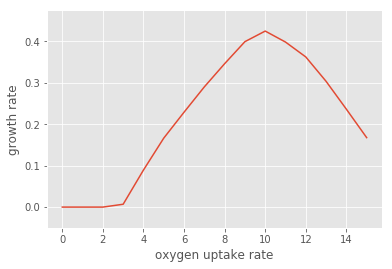

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

nSim = 16
growthRates = np.zeros(nSim)

for i in range(0, nSim - 1) :
    EX_o2_e.lower_bound = -i
    EX_o2_e.upper_bound = -i
    solution = modeliCW.optimize()
    growthRates[i+1] = solution.objective_value.real 
    
plt.plot(np.arange(0,nSim), growthRates)
plt.ylabel('growth rate')
plt.xlabel('oxygen uptake rate')
plt.ylim((min(growthRates)-0.05, max(growthRates)+0.05))
plt.savefig('oxigenUptake.png', format='png', dpi=500)
plt.show()

In [11]:
EX_o2_e.lower_bound = -10
EX_o2_e.upper_bound = -10

cobra\util\solver.py:419 UserWarning: solver status is 'infeasible'


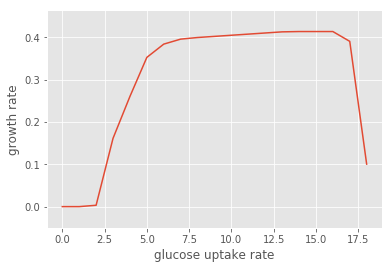

In [12]:
nSim = 19
Delta = -4.67-4.67
growthRates = np.zeros(nSim)

for i in range(0, nSim - 1) :
    EX_glc_e.lower_bound = -4 - 0.1*i
    EX_glc_e.upper_bound = -4 - 0.1*i
    solution = modeliCW.optimize()
    growthRates[i+1] = solution.objective_value.real 
    
plt.plot(np.arange(0,nSim), growthRates)
plt.ylabel('growth rate')
plt.xlabel('glucose uptake rate')
plt.ylim((min(growthRates)- 0.05, max(growthRates) + 0.05))
plt.savefig('glucoseUptake.png', format='png', dpi=500)
plt.show()

# Gene Knockouts

In [13]:
from cobra.flux_analysis import (
    single_gene_deletion, single_reaction_deletion, double_gene_deletion,
    double_reaction_deletion)

In [14]:
DGD = double_gene_deletion(modeliCW, return_frame=True)

In [16]:
import numpy
import matplotlib.pylab as plt
import seaborn as sns

In [17]:
SGD = single_gene_deletion(modeliCW, return_frame=True)
SGD.head()

,flux,status
0341,0.100365,optimal
cg0041,0.100365,optimal
cg0042,0.100365,optimal
cg0043,0.100365,optimal
cg0045,0.100365,optimal


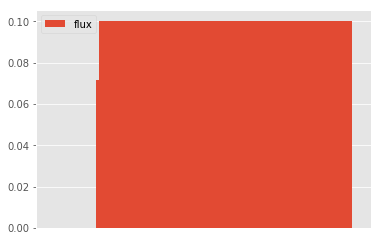

In [26]:
SGD.sort_values(by='flux', ascending=True).plot.bar(width=1)
#SGD.plot.bar()
plt.xticks([])
#plt.setp(labels, rotation=70, fontsize = 15)
plt.savefig('SGD.png', format='png', dpi=500)
plt.show()

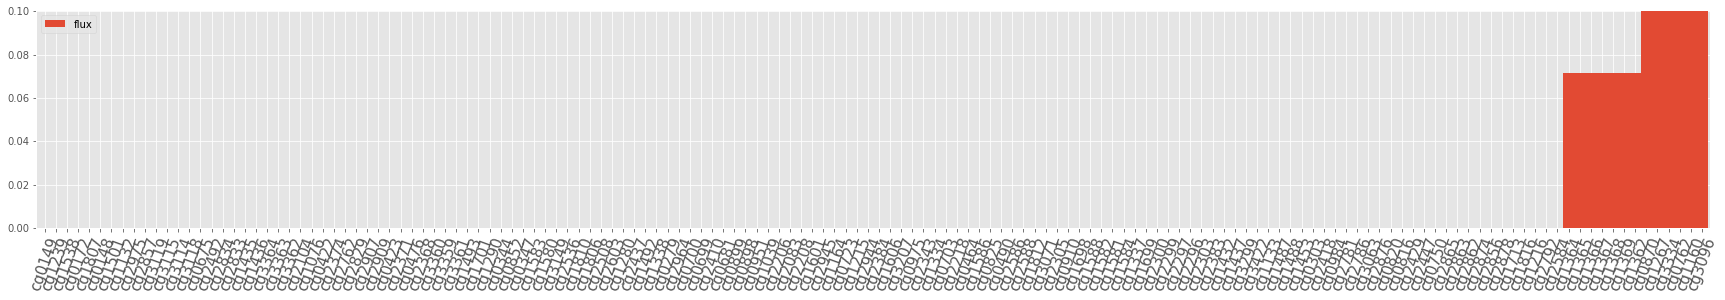

In [22]:
# aspec ration in pandas plots https://pandas.pydata.org/pandas-docs/stable/visualization.html
SGD.sort_values(by='flux', ascending=True).head(150).plot.bar(width=1, figsize=(30, 4))
locs, labels = plt.xticks()
plt.setp(labels, rotation=70, fontsize = 15)
plt.ylim((0, 0.100365))
plt.show()


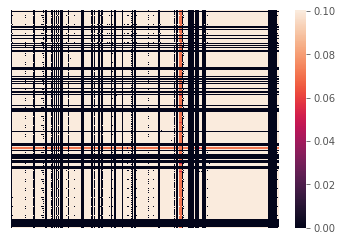

In [27]:
sns.heatmap(DGD)
plt.xticks([])
plt.yticks([])
plt.savefig('DGD.png', format='png', dpi=500)
plt.show()

  # Lysine production